# Question 3

### (b) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
%matplotlib inline

Text(0, 0.5, 'Waiting time (min)')

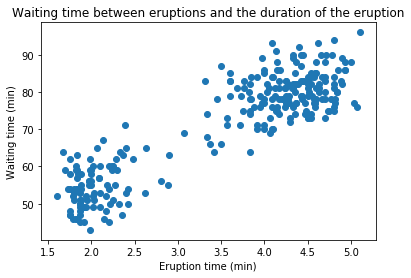

In [2]:
data = np.loadtxt('faithful.txt')

#eruption time column  
x = data[:,1]
#waiting time column
y = data[:,2]

#plot the graph
plt.figure()
plt.title("Waiting time between eruptions and the duration of the eruption")
plt.scatter(x,y)
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time (min)")

### (c)

In [26]:
# Using the built in GMM but storing results from each iteration using this method we wrote
def run():
    np.random.seed(80)
    init_means = [[np.random.uniform(min(data[:,1]), max(data[:,1]), 1)[0], np.random.uniform(min(data[:,2]), max(data[:,2]), 1)[0]],
              [np.random.uniform(min(data[:,1]), max(data[:,1]), 1)[0], np.random.uniform(min(data[:,2]), max(data[:,2]), 1)[0]]]
    i = 1
    means = []
    covs= []
    g = GaussianMixture(n_components=2, max_iter=i, means_init = init_means, covariance_type ='spherical')
    res = g.fit_predict(data[:,1:])

    while g.converged_ == False:
        means.append(g.means_)
        covs.append(g.covariances_)
        i += 1
        g = GaussianMixture(n_components=2, max_iter=i, means_init = init_means, covariance_type ='spherical')
        res = g.fit_predict(data[:,1:])
    return init_means, means, covs, res, g.n_iter_

/Users/hangyulin/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/hangyulin/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/hangyulin/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/hangyulin/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degen

Text(0, 0.5, 'Waiting time (min)')

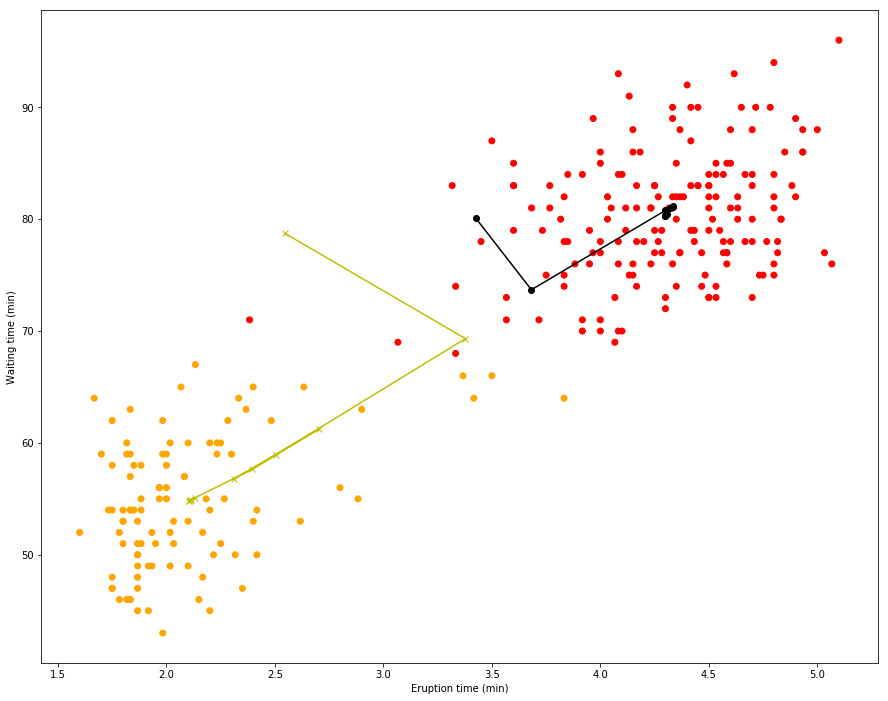

In [27]:
#Plot the trajectories of two mean vectors in 2 dimensions
init_means, means, covs, res, g_iter = run()
init_means = np.array([np.array(init_means[0]), np.array(init_means[1])])
means.insert(0, init_means)
means = np.array(means)
#eruption time column  
x = data[:,1]
#waiting time column
y = data[:,2]

#plot the graph
res = ['orange' if x ==1 else 'r' for x in res]
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111)
ax.scatter(x,y, c = res)

#plot the trajectory
ax.plot(means[:,0,0], means[:,0,1], color = "k", marker = "o")
ax.plot(means[:,1,0], means[:,1,1], color = "y", marker = "x")

plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time (min)")

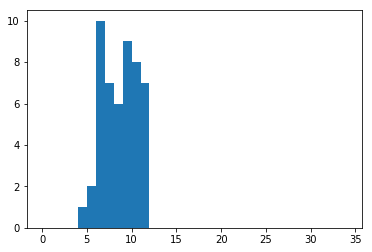

In [5]:
#Run your program for 50 times with different initial parameter guesses
count = []
for i in range(50):
    init_means = [[np.random.uniform(min(data[:,1]), max(data[:,1]), 1)[0], np.random.uniform(min(data[:,2]), max(data[:,2]), 1)[0]],
              [np.random.uniform(min(data[:,1]), max(data[:,1]), 1)[0], np.random.uniform(min(data[:,2]), max(data[:,2]), 1)[0]]]
    g_temp = GaussianMixture(n_components=2, init_params="random", means_init = init_means,covariance_type ='spherical')
    _ = g_temp.fit_predict(data[:,1:])
    count.append(g_temp.n_iter_)
_ = plt.hist(count, bins = np.arange(0,35))

d)

In [6]:
#run k-means algorithm with k = 2
km = KMeans(n_clusters = 2)
km.fit(data[:,1:])
k_labels = km.predict(data[:,1:])
km_means = km.cluster_centers_

km_cov = np.cov(data[k_labels == 0,1:].T)
km_cov = np.concatenate(([km_cov], [np.cov(data[k_labels == 1,1:].T)]))

print(km_means)
print(km_cov)

[[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]
[[[ 0.17865587  0.76756385]
  [ 0.76756385 31.66690466]]

 [[ 0.15583707  0.99561869]
  [ 0.99561869 34.75505051]]]


In [7]:
#Use means and covariances to input into GMM algorithms 
g_km = GaussianMixture(n_components=2, means_init = km_means)
g_km.covariances_ = km_cov
res_km = g_km.fit_predict(data[:,1:])

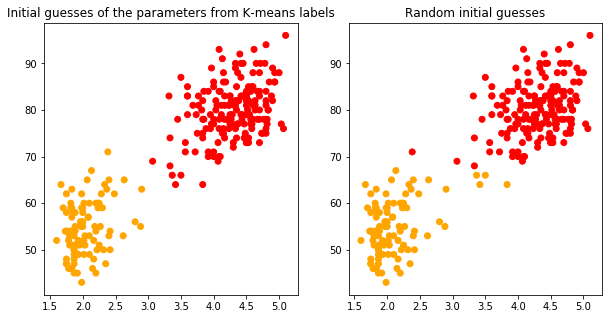

In [23]:
#plot the graph to see predictions 

#eruption time column  
x = data[:,1]
#waiting time column
y = data[:,2]

#plot the graph
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
#ax.title("Using mean and cov from labels of kmeans")
labels = ['orange' if x == 1 else 'r' for x in res_km]
ax.scatter(x,y, c = labels)
ax.title.set_text('Initial guesses of the parameters from K-means labels')

#plot the graph
ax_2 = fig.add_subplot(122)
ax_2.scatter(x,y, c = res)
ax_2.title.set_text('Random initial guesses')

In [29]:
print("With initial param of (d) took", g_km.n_iter_, "iterations to converage")
print("Without took", g_iter, "iterations to converage")

With initial param of (d) took 4 iterations to converage
Without took 8 iterations to converage


### From the two graphs above, we see that the result of bimodal GMM fit is about the same as GMM with initial guesses of the parameters from K-means labels. However, the model took model that has initial params from (d) only used 4 iteration to converage, while the model that had random initializer took 8 iteration to converge. Therefore the GMM model that had initial params from procedures in (d) performed better than in (c).